In [1]:
#진행도를 확인하기위한 패키지
from tqdm import tqdm
#시각화를 위한 패키지
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go

#!pip install konlpy
#형태소 분리기
from konlpy.tag import Mecab

#데이터를 다루기 위한 패키지
import pandas as pd
import numpy as np
import csv
import io
import re

#word2vector 패키지
from gensim.models import Word2Vec, KeyedVectors
import gensim

#사용자 정의 패키지
from data_preprocess import *
from time_check import *

In [3]:
#######################################################################
#데이터 불러오기

state = 3

#state
#0   리뷰데이터 text -> csv -> dataframe in data
#1   정재 전의 csv파일 읽기
#2   csv파일 정재
#3   문장 토큰화 -> tokenized_data

t = time_chk('state : '+str(state))
s = t.start()
if state == 0:
    contents = []
    with open('./save_data/shopping_data.txt','r',encoding='UTF-8') as f:
        reader = csv.reader(f, delimiter='\n')
        for row in reader:
            contents.append(row[0].split('\t'))
    res = pd.DataFrame(contents, columns=['score','review'])
    res.to_csv('./save_data/naver_review.csv',mode='w')
    t.end()
elif state == 1:
    data = pd.read_csv('./save_data/naver_review.csv')
    data = data[['score','review']]
    t.end()
elif state == 2:
    data = pd.read_csv('./save_data/naver_review.csv')
    data = data[['score','review']]
    data = dataframe_clean(data,'review')

    data.to_csv('./save_data/naver_review_puretext.csv',mode='w')
    t.end()
elif state == 3:
    tokenized_data = []
    for sentence in tqdm(data['review']):
        tokenized_senetence = mecab_tokenizer(sentence)
        if tokenized_senetence:
            tokenized_data.append(tokenized_senetence)
    
t.eend(s)
#######################################################################


************************************************************


************************************************************
                    state : 3                     



100%|█████████████████████████████████████████████████████████████████████████| 199908/199908 [05:54<00:00, 563.66it/s]

************************************************************
총 걸린시간: 0:05:54.66                            354.66 s





In [7]:
#######################################################################
#모델 학습

state = 2

#state
#0   위키 데이터 학습모델 불러오기
#1   위키 데이터 학습모델 불러오기 + finetune 학습
#2   리뷰데이터 모델 학습

t = time_chk('state : '+str(state))
s = t.start()

if state == 0:
    model_pretrained = gensim.models.Word2Vec.load('./model/ko.bin')
    print('pretrained')
    print(model_pretrained.wv.vectors.shape)
elif state == 1:
    model_pretrained = gensim.models.Word2Vec.load('./model/ko.bin')
    print('pretrained')
    print(model_pretrained.wv.vectors.shape)
    
    model_finetuned = Word2Vec(size=200, min_count=0)
    total_examples = model_finetuned.corpus_count
    model_finetuned.build_vocab([list(model_pretrained.wv.vocab.keys())], update=True)
    model_finetuned.train(tokenized_data, total_examples= total_examples, epochs= 1)
    print('pretrain + reviews')
    print(model_finetuned.wv.vectors.shape)
elif state == 2:
    model_only_reviewdata = Word2Vec(size=200, sentences= tokenized_data, min_count=0,sg=1)
    print('review_only')
    print(model_only_reviewdata.wv.vectors.shape)
    
t.eend(s)
#######################################################################


************************************************************


************************************************************
                    state : 2                     

review_only
(23916, 200)
************************************************************
총 걸린시간: 0:00:09.47                            9.4778 s





In [8]:
#######################################################################
#모델 저장 및 불러오기

state = 2.1

#state
#0   model_pretrained 불러오기
#0.1 model_pretrained 저장
#1   model_finetuned 불러오기
#1.1 model_finetuned 저장
#2   model_only_reviewdata 불러오기
#2.1 model_only_reviewdata 저장

t = time_chk('state : '+str(state))
s = t.start()

if state == 0:
    model_pretrained = gensim.models.Word2Vec.load('./model/ko.bin')
elif state == 0.1:
    model_pretrained.save('./model/ko.bin')
elif state == 1:
    model_finetuned = gensim.models.Word2Vec.load('./model/fintuned.model')
elif state == 1.1:
    model_finetuned.save('./model/model_finetuned.model')
elif state == 2:
    model_only_reviewdata = gensim.models.Word2Vec.load('./model/only_review.model')
elif state == 2.1:
    model_only_reviewdata.save('./model/only_review.model') 
t.eend(s)
#######################################################################


************************************************************


************************************************************
                   state : 2.1                    

************************************************************
총 걸린시간: 0:00:00.62                            0.6242 s





In [9]:
mecab_pos('가성비가 좋네요')

[('가성비', 'NNP'), ('가', 'JKS'), ('좋', 'VA'), ('네요', 'EC')]

In [15]:

#######################################################################
# 모델 테스트

state = 2

#state
#0   pretrain만
#1   finetune만
#2   only review만
#3   전체
t = time_chk('state : '+str(state))
s = t.start()

test_word = '가성비'
compare_word ='가격'

print('testword: {} compareword: {}'.format(test_word,compare_word))
if state == 0:
    if test_word in model_pretrained.wv :
        print('pretrained :',model_pretrained.wv.most_similar(test_word))
        if compare_word in model_pretrained.wv :
            print(model_pretrained.wv.similarity(test_word, compare_word))
            print()
elif state == 1:
    if test_word in model_finetuned.wv :
        print('fintuend :',model_finetuned.wv.most_similar(test_word))
        if compare_word in model_finetuned.wv :
            print(model_finetuned.wv.similarity(test_word, compare_word))
            print()
elif state == 2:
    if test_word in model_only_reviewdata.wv :
        print('only_review :',model_only_reviewdata.wv.most_similar(test_word))
        if compare_word in model_only_reviewdata.wv :
            print(model_only_reviewdata.wv.similarity(test_word, compare_word))
            print()
elif state == 3:
    if test_word in model_pretrained.wv :
        print('pretrained :',model_pretrained.wv.most_similar(test_word))
        if compare_word in model_pretrained.wv :
            print(model_pretrained.wv.similarity(test_word, compare_word))
            print()
    
    if test_word in model_finetuned.wv :
        print('fintuend :',model_finetuned.wv.most_similar(test_word))
        if compare_word in model_finetuned.wv :
            print(model_finetuned.wv.similarity(test_word, compare_word))
            print()

    if test_word in model_only_reviewdata.wv :
        print('only_review :',model_only_reviewdata.wv.most_similar(test_word))
        if compare_word in model_finetuned.wv :
            print(model_only_reviewdata.wv.similarity(test_word, compare_word))
            print()
t.eend(s)
#######################################################################
#모델 테스트



************************************************************


************************************************************
                    state : 2                     

testword: 가성비 compareword: 가격
only_review : [('우수', 0.8552525043487549), ('가격대', 0.8439527750015259), ('끝판', 0.8332892060279846), ('가성', 0.828201949596405), ('두말', 0.8206555843353271), ('품질', 0.8174193501472473), ('뛰어나', 0.8151068687438965), ('필드', 0.8138678073883057), ('스럽', 0.8124242424964905), ('행도', 0.810417890548706)]
0.768276

************************************************************
총 걸린시간: 0:00:00.00                            0.0020 s





In [2]:
#txt -> csv
#기존 쇼핑몰 리뷰 데이터의 파일을 바꿔줍니다.
contents = []
with open('./save_data/shopping_data.txt','r',encoding='UTF-8') as f:
    reader = csv.reader(f, delimiter='\n')
    for row in reader:
        contents.append(row[0].split('\t'))

    data = pd.DataFrame(contents, columns=['score','review'])
res.to_csv('./save_data/naver_review.csv',mode='w')


"\ncontents = []\nwith open('shopping_data.txt','r',encoding='UTF-8') as f:\n    reader = csv.reader(f, delimiter='\n')\n    for row in reader:\n        contents.append(row[0].split('\t'))\n\n    res = pd.DataFrame(contents, columns=['score','review'])\nres.to_csv('naver_review.csv',mode='w')\n"

In [2]:
#data 불러오기
#csv파일을 DataFrame으로 바꿔서 진행합니다.
data = pd.read_csv('./save_data/naver_review.csv')
data.head()
data = data[['score','review']]

data = pd.read_csv('./save_data/naver_review_puretext.csv')

In [4]:
#정규식을 이용해서 특수기호 제거
# sample: 화면빨인가봐요;; 노란컬러가 돋보여요;; 저렴한맛에 그냥 씁니다

print(data.loc[12])

k = 0
for i in tqdm(data['review']):
    text = re.compile('[ㄱ-ㅎ|a-z|A-Z|ㅏ-ㅣ|가-힣]+').findall(i)
    data.loc[k, 'review'] = ' '.join(text).strip()
    k = k + 1

data.to_csv('./save_data/naver_review_puretext.csv',mode='w')

Unnamed: 0                                 12
score                                       2
review        화면빨인가봐요 노란컬러가 돋보여요 저렴한맛에 그냥 씁니다
Name: 12, dtype: object


100%|███████████████████████████████████████████████████████████████████████| 200000/200000 [00:18<00:00, 10916.37it/s]


In [5]:
#sample: 화면빨인가봐요 노란컬러가 돋보여요 저렴한맛에 그냥 씁니다
print(data.loc[12])

In [5]:
#결측치 제거
print(len(data))
drop_idx = data[data['review']==''].index
data = data.drop(drop_idx)
print(len(data))

200000
200000


In [3]:
'''
mecab tagger is not defined error
mecab-ko 설치
cd /tmp
sudo wget https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
sudo tar xvf mecab-0.996-ko-0.9.2.tar.gz

cd /tmp/mecab-0.996-ko-0.9.2
sudo ./configure
sudo make check
sudo make install

mecab-dic 설치
cd /tmp
wget https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.1.1-20180720.tar.gz
tar zxvf mecab-ko-dic-2.1.1-20180720.tar.gz

cd /tmp/mecab-ko-dic-2.1.1-20180720
sudo ./autogen.sh
sudo ./configure
sudo make
sudo make install

mecab-python 설치
cd /tmp
git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
cd mecab-python-0.996
python3 setup.py build
python3 setup.py install
'''

'\nmecab tagger is not defined error\nmecab-ko 설치\ncd /tmp\nsudo wget https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz\nsudo tar xvf mecab-0.996-ko-0.9.2.tar.gz\n\ncd /tmp/mecab-0.996-ko-0.9.2\nsudo ./configure\nsudo make check\nsudo make install\n\nmecab-dic 설치\ncd /tmp\nwget https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.1.1-20180720.tar.gz\ntar zxvf mecab-ko-dic-2.1.1-20180720.tar.gz\n\ncd /tmp/mecab-ko-dic-2.1.1-20180720\nsudo ./autogen.sh\nsudo ./configure\nsudo make\nsudo make install\n\nmecab-python 설치\ncd /tmp\ngit clone https://bitbucket.org/eunjeon/mecab-python-0.996.git\ncd mecab-python-0.996\npython3 setup.py build\npython3 setup.py install\n'

In [4]:
#형태소 분리기
mecab = Mecab("C:/mecab/mecab-ko-dic")

stop_words = set(['JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ', 'JX', 'JC'])

def tokenizer(row):
    return mecab.morphs(row)
'''
tokenized_data = data['review'].apply(tokenizer)
'''

"\ntokenized_data = data['review'].apply(tokenizer)\n"

In [5]:
#문장을 토큰화
tokenized_data = []
for sentence in tqdm(data['review']):
    tokenized_senetence = mecab.morphs(sentence)
    removed_stop_words = [w for w in tokenized_senetence if mecab.pos(w)[0][1] not in stop_words]
    if removed_stop_words:
            tokenized_data.append(removed_stop_words)

100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [00:36<00:00, 5449.66it/s]


최대 토큰 개수 : 86
평균 토큰 개수 : 18.31469


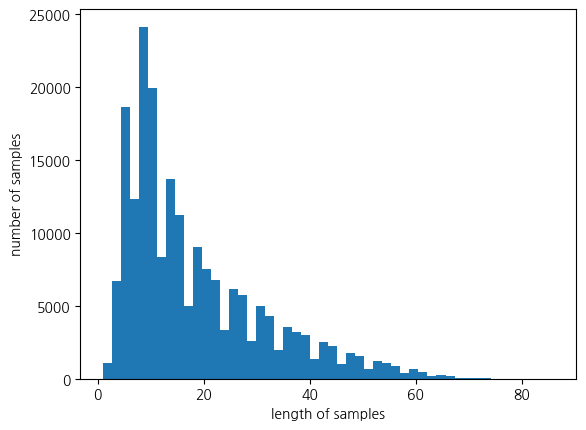

In [11]:
#데이터 분석
print('최대 토큰 개수 :', (max(len(i) for i in tokenized_data)))
print('평균 토큰 개수 :', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [4]:
'''
AttributeError : Can't get attribute 'Vocab' on (module 'gensim.models.word2vec' from '~~~' 
gensim버전문제
4.0.x버전부터 vocab이 사라져서 ko.bin로드를 하기위해서는 3.8.x버전이어야함
그래서 3.8.3version으로 다운그레이드
pip install --upgrade gensim===3.8.3
'''
#출처
#https://github.com/Kyubyong/wordvectors
#위키-한국어를 학습한 미리학습된 model
model_pretrained = gensim.models.Word2Vec.load('./model/ko.bin')
print(model_pretrained.wv.vectors.shape)

(30185, 200)


In [13]:
#위키-한국어 + 네이버 리뷰데이터 학습

model_finetuned = Word2Vec(size=200, min_count=0)
model_finetuned.build_vocab(tokenized_data)
total_examples = model_finetuned.corpus_count

200000
(45011, 200)


In [5]:
model_finetuned.build_vocab([list(model_pretrained.wv.vocab.keys())], update=True)
model_finetuned.train(tokenized_data, total_examples= total_examples, epochs= 1)

model_finetuned = gensim.models.Word2Vec.load('./model/fintuned.model')
print(model_pretrained.wv.vectors.shape)

(30185, 200)


In [6]:
#네이버 리뷰만 학습한 model
model_only_reviewdata = Word2Vec(sentences= tokenized_data, min_count=0,sg=1)

model_only_reviewdata = gensim.models.Word2Vec.load('./model/only_review.model')
print(model_only_reviewdata.wv.vectors.shape)

In [5]:
#모델 테스트
test_word = '가성비'
compare_word ='돈'

print('testword: {} compareword: {}'.format(test_word,compare_word))
'''
if test_word in model_pretrained.wv :
    print('pretrained :',model_pretrained.wv.most_similar(test_word))
    if compare_word in model_pretrained.wv :
        print(model_pretrained.wv.similarity(test_word, compare_word))
        print()
    
if test_word in model_finetuned.wv :
    print('fintuend :',model_finetuned.wv.most_similar(test_word))
    if compare_word in model_finetuned.wv :
        print(model_finetuned.wv.similarity(test_word, compare_word))
        print()
    '''
if test_word in model_only_reviewdata.wv :
    print('only_review :',model_only_reviewdata.wv.most_similar(test_word))
    if compare_word in model_finetuned.wv :
        print(model_only_reviewdata.wv.similarity(test_word, compare_word))
        print()
model_only_reviewdata.wv.most_similar('성비')
print(mecab_pos('가성비가 좋아요'))

testword: 가성비 compareword: 돈
[('가성', 'NNG'), ('비', 'NNG'), ('가', 'JKS'), ('좋', 'VA'), ('아요', 'EC')]


C:\ProgramData\Anaconda3\envs\jupyterEnv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\jupyterEnv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


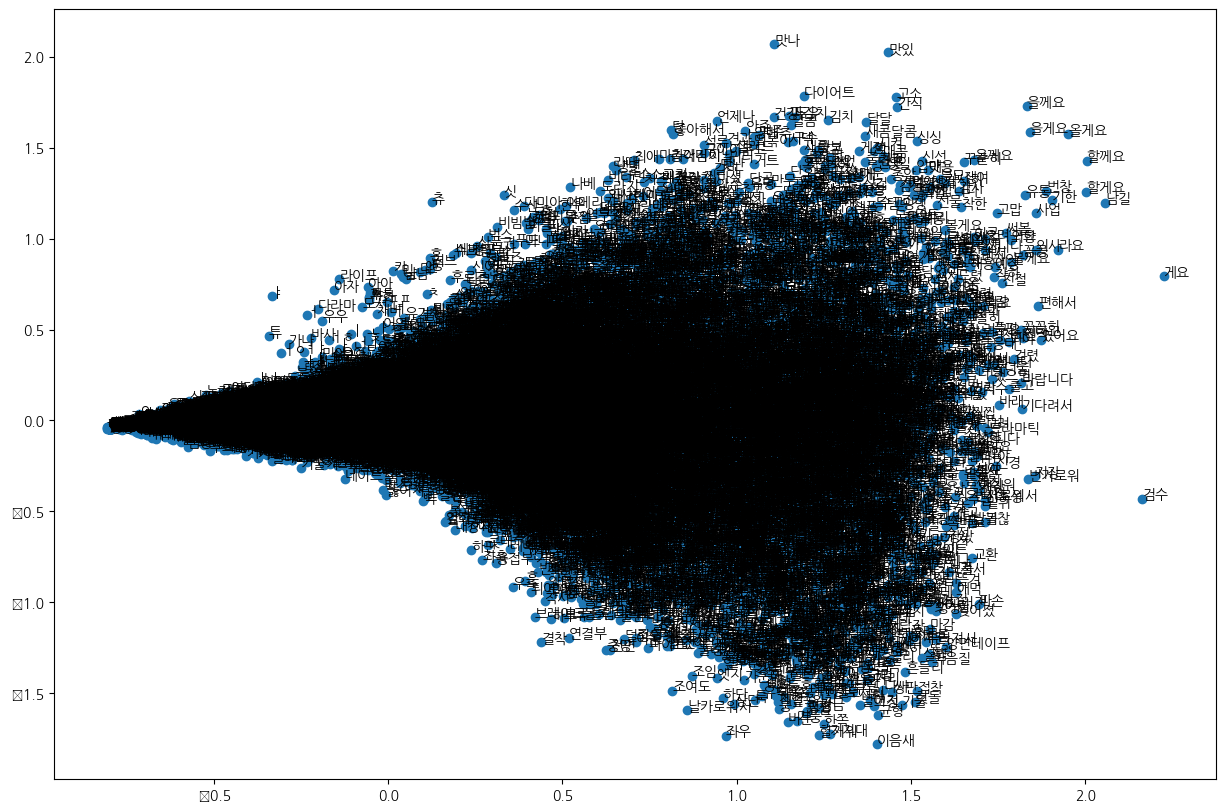

In [19]:
#리뷰 데이터모델 시각화
word_vectors = model_only_reviewdata.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys=xys[:,1]
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(15,10))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs):
        plt.annotate(v,xy=(xs[i], ys[i]))
        
plot_2d_graph(vocabs, xs,ys)